In [1]:
with __import__('importnb').Notebook(): 
    from QCircuit import *

In [12]:
# временные параметры
dt = 0.01
Time = 100
clock = 1
nums = 1

#цепь
C = 5*10**(-14)
Ij = 40*e**3/hbar/C
L = 2 * 10**(-8)
M = 2 * 10**(-8)
#I = 1.72 * 10**(-8)

transmon = Transmon(psi = [1, 0], C = C, Ij1 = Ij, Ij2 = 0, M = 0)
coupling = Coupling(C /60)
n_osc = 6
alpha = 0
gamma = 0.02
osc = Oscillator(psi= np.exp(-alpha**2/2)*alpha**np.arange(n_osc)/np.sqrt(scipy.special.factorial(np.arange(n_osc))),\
                 L = L, C = C/1., gamma = gamma, noise = 1)
drive_osc = InSignal()
drive_tr = InSignal()
circuit = Circuit([transmon, coupling, osc, drive_osc, drive_tr],  [[1, 4], [0, 2], [1], [2], [0]], dt = dt)

# paraments
A = 1
I0 = 0.1
Q0 = - I0
fc = 4.5
fI = fQ = 0.5 #итоговый сигнал будет на fc+fI c маплитудой (I0-Q0)/2 и аналогичен -cos поданному сразу

# приборы
lo = LO(drive_osc)
lo.set_frequency(fc)
lo.set_power(1.)
awg_osc = AWG(drive_osc)
awg_tr =AWG(drive_tr)
lo_m = LO(drive_osc)
lo_m.set_frequency(fc)
lo_m.set_power(1.)
mi = MI()
mi.set_circuit(drive_osc)
mi.set_lo(lo_m)
mi.set_circuit(circuit)
mi.set_clock(clock)

# подача сигналов
t_end = 20
t_clock = np.arange(0, t_end, clock)
awg_osc.set_nop(t_clock.size)
awg_osc.set_waveform(I0 * np.sin(2 * np.pi * fI * t_clock), 0)
awg_osc.set_waveform(Q0 * np.cos(2 * np.pi * fQ * t_clock), 1)
awg_osc.set_clock(clock)

# считываение сигналов
mi.set_nums(nums)
mi.set_nop(round(Time/clock))
#mi.set_nop(round(Time//dt + 1))
waveform = np.zeros((round(Time//dt + 1)))
waveform[0] = 1
mi.set_digital(waveform, 0)
mi.set_cutoff_freq(10)
mi.set_clock(1/clock)


transmon = Transmon(psi = [1, 0], C = C, Ij1 = Ij, Ij2 = 0, M = 0)
circuit = Circuit([transmon, coupling, osc, drive_osc],  [[1], [0, 2], [1], [2]], dt = dt)
mi.set_circuit(circuit)
signal0 = mi.measure()

transmon = Transmon(psi = [0, 1], C = C, Ij1 = Ij, Ij2 = 0, M = 0)
circuit = Circuit([transmon, coupling, osc, drive_osc],  [[1], [0, 2], [1], [2]], dt = dt)
mi.set_circuit(circuit)
signal1 = mi.measure()

len(weveform) 10000 dt 0.01 clock 1.0
finish while i 0
len(weveform) 10000 dt 0.01 clock 1.0
finish while i 0


In [13]:
transmon = Transmon(psi = [1, 0], C = C, Ij1 = Ij, Ij2 = 0, M = 0)
circuit = Circuit([transmon, coupling, osc, drive_osc],  [[1], [0, 2], [1], [2]], dt = dt)
mi.set_circuit(circuit)
mi.set_feature_real(feature_id = 0, feature = signal0['x0'], threshold = 0.00005)
mi.set_feature_real(feature_id = 1, feature = signal1['x0'], threshold = 0.00005)
signal = mi.measure()

len(weveform) 10000 dt 0.01 clock 1.0
finish while i 0


In [14]:
print(signal['x2'].size)

100


1


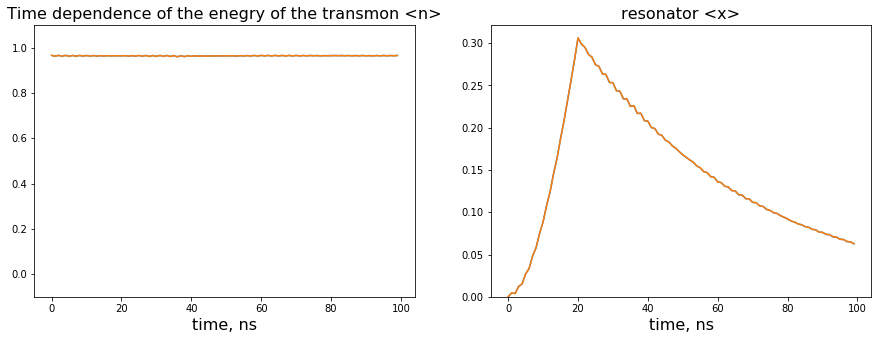

In [15]:
time = np.arange(0, Time, 1)
print(time[1])
fig, (f1, f2) = plt.subplots(
    nrows = 1, ncols = 2,
    figsize=(15, 5)
)
f1.plot(time, np.real(signal1['z0'])/nums)
f1.plot(time, np.real(signal1['z0'])/nums)
f1.set_title("Time dependence of the enegry of the transmon <n>", size =16)
f1.set_xlabel('time, ns', size =16)
f1.set_ylim(-0.1, 1.1)
#f2.plot(time, np.abs(x2mean))
f2.plot(time, np.real(signal1['z2'])/nums)
f2.plot(time, np.real(signal1['z2'])/nums)
f2.set_title("resonator <x>", size =16)
f2.set_xlabel('time, ns', size =16)
f2.set_ylim(bottom = 0.0)
plt.show()